Task 2: Training from scratch
- development of a classification model for discriminating between 2 classes: fruits and vegetables;
- development of a classification model for discriminating between subclasses of each parent class.

### Authentication and enabling GPU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Tensorflow is already installed in Colab
# check if tensorflow is installed
import tensorflow as tf
print(tf.__version__) 
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('you must enable GPU! Go to:')
  print('\nRuntime')
  print('\tChange runtime type')
  print('\t\tHardware Accelerator: GPU')

  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

2.7.0
Found GPU at: /device:GPU:0


In [ ]:
import re
prova = "CIAO98e34"
print(prova[4:])
results = re.findall("\d+", prova)
print(results)
print(prova.find("98e"))

if(-1):
  print("stampa?")

98e34
['98', '34']
4
stampa?


In [ ]:
import re
list = ['float','double','float128','Posit32e2','Posit32e3','Posit32e4',
        'Posit32e5','Posit32e6','Posit32e7','Posit32e8','Posit32e9',
        'Posit32e10','Posit32e11','Posit32e12','Posit32e13','Posit32e14','Posit32e15',
        'Posit32e16','Posit32e17','Posit32e18','Posit32e19','Posit32e20',
        'Posit64e2','Posit64e3','Posit64e4','Posit64e5','Posit64e6','Posit64e7',
        'Posit64e8','Posit64e9','Posit64e10','Posit64e11','Posit64e12','Posit64e13',
        'Posit64e14','Posit64e15','Posit64e16','Posit64e17','Posit64e18','Posit64e19',
        'Posit64e20','Posit64e21','Posit64e22','Posit64e23','Posit64e24','Posit64e25',
        'Posit64e26','Posit64e27','Posit64e28','Posit64e29','Posit64e30','Posit64e31']


#PARAMETERS
SIZE = 50
TYPE = "Posit"

sub_list = list

f = open("demo.txt", "w")

#manca parte using Posit32e2... ed typedef MatrxXp32e2...
for elem in sub_list:
  TYPE = elem
  if(elem.find("Posit") != -1):
    MATRIX_TYPE = "MatrixXp" + elem[5:]
    VAR = "mp" + elem[5:]
    numbers = re.findall("\d+", elem)
    BIT = numbers[0] #MUST BE 32 OR 64
    EXP = numbers[1] #MUST BE 0<EXP<BIT
  else:
    MATRIX_TYPE = "MatrixX" + elem
    VAR = "m" + elem

  if(elem.find("Posit")!= -1):
    f.write("using "+TYPE+" = posit::Posit<int"+BIT+"_t, "+BIT+","+EXP+", uint"+BIT+"_t, posit::PositSpec::WithNan>;\n")
  f.write("typedef Eigen::Matrix<" + TYPE + ",Eigen::Dynamic,Eigen::Dynamic>" + MATRIX_TYPE +";\n")
f.write("\n")   

f.write("ofstream file_grcar;\n")
f.write('file_grcar.open("grcar_MeanSquareError.csv");\n')

f.write('file_grcar<<"size,')
for elem in sub_list:
  if(elem.find("Posit") != -1):
    VAR = "p" + elem[5:]
  else:
    VAR =  elem
  f.write(elem + ",")
f.write('"<<"\\n";\n\n')

f.write('for(int size=10; size<= SIZE; size+=10){\n std::cout<<"size: "<<size<<std::endl;\n')
for elem in sub_list:
  print(elem)
  TYPE = elem
  if(elem.find("Posit") != -1):
    MATRIX_TYPE = "MatrixXp" + elem[5:]
    VAR = "mp" + elem[5:]
    numbers = re.findall("\d+", elem)
    BIT = numbers[0]
    EXP = numbers[1]
  else:
    MATRIX_TYPE = "MatrixX" + elem
    VAR = "m" + elem
 
  f.write(MATRIX_TYPE+" "+VAR+"(size,size);\n")
  f.write("getGrcarMatrix<"+MATRIX_TYPE+","+TYPE+">("+VAR+",size);\n")
  f.write("auto eig_"+VAR+" = "+VAR+".eigenvalues();\n")
  f.write("auto eig_"+VAR+"_tr = "+VAR+".transpose().eigenvalues();\n")
  if(elem.find("Posit") != -1):
    f.write("auto res_"+VAR+" = double((eig_"+VAR+" - eig_"+VAR+"_tr).squaredNorm())/size;\n")
  else:
    f.write("auto res_"+VAR+" = ((eig_"+VAR+" - eig_"+VAR+"_tr).squaredNorm())/size;\n")

f.write('file_grcar<<size<<","')
for elem in sub_list:
  if(elem.find("Posit") != -1):
    VAR = "mp" + elem[5:]
  else:
    VAR = "m" + elem
  f.write("<<res_"+VAR+'<<","')
  
f.write('<<"\\n";\n')
f.write("}\n")
f.write("file_grcar.close();")


f.close()  

['float', '2.22525', '2.1132', '1.93535', '1.70671', '1.45362', '0.221281', '0.64369', '1.2261', '0.990645', '1.12157', '2.22523', '2.11323', '1.93533', '1.70672', '1.45362', '1.2261', '0.221281', '0.64369', '1.12157', '0.990647']
['posit32e8', '2.19192', '0.149559', '1.22606', '0.990621', '1.12154', '1.81582', '1.35279', '0.141433', '1.47018', '1.42189', '0.254866', '0.643667', '1.12155', '0.990629']


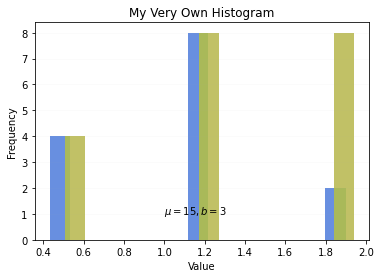

In [3]:
stringa1 = "float 2.22525 2.1132 1.93535 1.70671 1.45362 0.221281 0.64369 1.2261 0.990645 1.12157 2.22523 2.11323 1.93533 1.70672 1.45362 1.2261 0.221281 0.64369 1.12157 0.990647 "
stringa2 = "posit32e8 2.19192 0.149559 1.22606 0.990621 1.12154 1.81582 1.35279 0.141433 1.47018 1.42189 0.254866 0.643667 1.12155 0.990629 "
stringa3 = "douable 2.22525 2.11319 1.93535 1.70671 1.45362 1.2261 0.22128 0.64369 0.990646 1.12157 2.22525 2.11319 1.93535 1.70671 1.45362 1.2261 0.22128 0.64369 1.12157 0.990646"


lista1 = stringa1.split()
print(lista1)
lista2 = stringa2.split()
print(lista2)
lista3 = stringa3.split()

floats1 = []
for element in lista1[1:]:
    floats1.append(float(element))

floats2 = []
for element in lista2[1:]:
    floats2.append(float(element))

doubles = []
for element in lista3[1:]:
    doubles.append(float(element))


import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=floats1, bins= 3, color='#0000FF',alpha=0.6, rwidth=0.15) #blu
                            
n, bins, patches = plt.hist(x=floats2, bins= 3, color='#0345cc', alpha=0.6, rwidth=0.15)
n, bins, patches = plt.hist(x=doubles, bins= 3, color='#FFFF00', alpha=0.6, rwidth=0.15) #giallo
plt.grid(axis='y', alpha=0.05)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(1, 1, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)



### Global libraries and utility



In [ ]:
import os
import os.path
import timeit
import datetime
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import tensorflow as tf
from pathlib import Path
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.regularizers import l2, l1
from tensorflow.keras import regularizers
from tensorflow.python.framework import ops
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

#magic command for enabling tensorflow 1.x
#%tensorflow_version 1.x 

# print tensorflow and keras versions
print(tf.__version__)
print(keras.__version__)





2.7.0
2.7.0


In [ ]:
def proc_img(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [ ]:

def get_training_learning_dataframes(df_dataset,numberTests = 5):

  df_unique_labels = df_dataset.copy().drop_duplicates(subset=["Label"]).reset_index()
  list_labels = df_unique_labels["Label"].tolist()


  df_test = pd.DataFrame(columns=['Filepath','Label'])
  df_training = pd.DataFrame(columns=['Filepath','Label'])
  cum_indices = []

  for etichetta in list_labels:
    list_indices = df_dataset[(df_dataset.Label==etichetta)].index
    indices = [ list_indices[j] for j in range(numberTests)] #get only the first 'numberTests' indices of a set of samples for a specific class


    for elem in indices:
      cum_indices.append(elem)

    df_tmp = pd.DataFrame(df_dataset.iloc[indices])
    df_test = pd.concat([df_test,df_tmp],ignore_index = True, axis = 0)


  cum_indices.sort()

  df_training = df_dataset.iloc[~df_dataset.index.isin(cum_indices)] 
  df_training.reset_index(drop=True, inplace=True)

  return df_training,df_test


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"), 
    layers.RandomRotation(0.2), 
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1, fill_mode="constant", fill_value=255),
    layers.RandomZoom(0.1, fill_mode="nearest") 
  ]
)

In [ ]:
BATCH_SIZE = 20 
NUMBER_CLASSES = 33
PATIENCE = 20 
IMAGE_HEIGHT = 180
IMAGE_WIDTH = 180
EPOCH = 20

PATH_DATASET = '/content/drive/Shareddrives/CIDL/dataset/preprocessed_binary'
PATH_DATASET_PROVA = '/content/drive/Shareddrives/CIDL/dataset/preprocessedProva'
PATH_HOME = '/content/drive/Shareddrives/CIDL/'

###Loading dataset

In [ ]:
# Create a list with the filepaths for training and testing
dataset_dir = Path(PATH_DATASET)
dataset_filepaths = list(dataset_dir.glob(r'**/*.jpg'))


df_dataset = proc_img(dataset_filepaths)
df_training,df_test = get_training_learning_dataframes(df_dataset,175)

In [ ]:

train_datagenerator = ImageDataGenerator(
       rescale= 1. / 255.0,
       validation_split=0.20
)

test_datagenerator = ImageDataGenerator(rescale= 1. / 255.0) 

In [ ]:
train_images = train_datagenerator.flow_from_dataframe(
    dataframe=df_training,
    x_col='Filepath',
    y_col='Label',
    subset= "training",
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=0,
)

val_images = train_datagenerator.flow_from_dataframe(
    dataframe=df_training,
    x_col='Filepath',
    y_col='Label',
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    subset= "validation",
    color_mode='rgb',
    class_mode='binary',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=0,
)


test_images = test_datagenerator.flow_from_dataframe(
    dataframe=df_test,
    x_col='Filepath',
    y_col='Label',
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    color_mode='rgb',
    class_mode='binary',
    seed=0,
    batch_size=1,
    shuffle=False   
)

Found 2140 validated image filenames belonging to 2 classes.
Found 535 validated image filenames belonging to 2 classes.
Found 350 validated image filenames belonging to 2 classes.


### Model 1


In [ ]:
#NETWORK ARCHITECTURE

inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 88, 88, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 86, 86, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [ ]:
PATH_HOME = '/content/drive/Shareddrives/CIDL/'
dir_name = PATH_HOME + "/models"
model_name = 'model1-scratch-binaryclass.h5'
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,model_name)



earlyStopping = tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=PATIENCE,
                restore_best_weights=True)
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=EPOCH,
    callbacks = [earlyStopping, modelCheckpoint]
)


Epoch 1/20
  6/107 [>.............................] - ETA: 2:02 - loss: 0.7067 - accuracy: 0.5667

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 63/107 [================>.............] - ETA: 48s - loss: 0.6068 - accuracy: 0.6698

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


107/107 [==============================] - ETA: 0s - loss: 0.5584 - accuracy: 0.7061
Epoch 00001: val_loss improved from inf to 0.62643, saving model to /content/drive/Shareddrives/CIDL//models/model1-scratch-binaryclass.h5
107/107 [==============================] - 147s 1s/step - loss: 0.5584 - accuracy: 0.7061 - val_loss: 0.6264 - val_accuracy: 0.7421
Epoch 2/20
107/107 [==============================] - ETA: 0s - loss: 0.4785 - accuracy: 0.7556
Epoch 00002: val_loss improved from 0.62643 to 0.47448, saving model to /content/drive/Shareddrives/CIDL//models/model1-scratch-binaryclass.h5
107/107 [==============================] - 96s 896ms/step - loss: 0.4785 - accuracy: 0.7556 - val_loss: 0.4745 - val_accuracy: 0.7383
Epoch 3/20
107/107 [==============================] - ETA: 0s - loss: 0.4538 - accuracy: 0.7589
Epoch 00003: val_loss did not improve from 0.47448
107/107 [==============================] - 96s 896ms/step - loss: 0.4538 - accuracy: 0.7589 - val_loss: 0.4819 - val_accurac

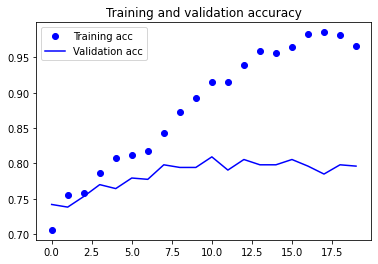

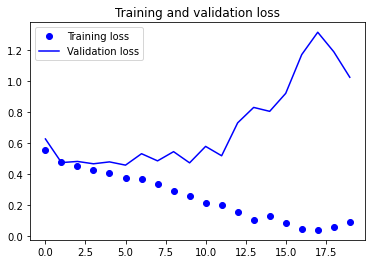

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model = keras.models.load_model(PATH_HOME + '/models/model1-scratch-binaryclass.h5')

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
print(pred)
#pred = np.argmax(pred,axis=1)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
print(pred)
pred = pred[:,0]
print(pred)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 80.00%


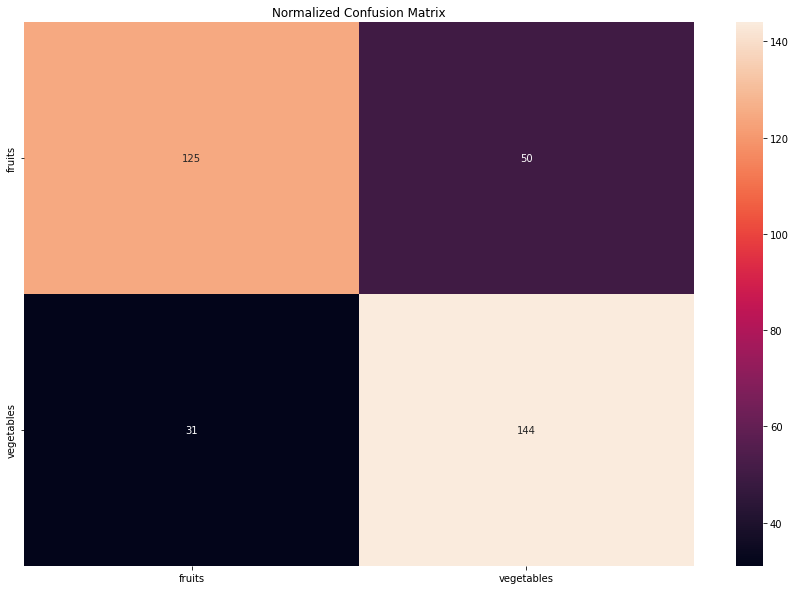

In [ ]:


cf_matrix = confusion_matrix(y_test, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(y_test)), 
            yticklabels = sorted(set(y_test)),fmt="d"
            )
plt.title('Normalized Confusion Matrix')
plt.show()

### Model 2

In [ ]:
#NETWORK ARCHITECTURE

inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)  #<----------- Added Convolutional Layer and increased filter dimension
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 88, 88, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 86, 86, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [ ]:
PATH_HOME = '/content/drive/Shareddrives/CIDL/'
dir_name = PATH_HOME + "/models"
model_name = 'model2-scratch-binaryclass.h5'
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,model_name)



earlyStopping = tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=PATIENCE,
                restore_best_weights=True)
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=EPOCH,
    callbacks = [earlyStopping, modelCheckpoint]
)


Epoch 1/20
 39/107 [=========>....................] - ETA: 49s - loss: 0.6592 - accuracy: 0.5731

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


106/107 [============================>.] - ETA: 0s - loss: 0.5645 - accuracy: 0.6792

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


107/107 [==============================] - ETA: 0s - loss: 0.5630 - accuracy: 0.6808
Epoch 00001: val_loss improved from inf to 0.49849, saving model to /content/drive/Shareddrives/CIDL//models/model2-scratch-binaryclass.h5
107/107 [==============================] - 98s 911ms/step - loss: 0.5630 - accuracy: 0.6808 - val_loss: 0.4985 - val_accuracy: 0.7439
Epoch 2/20
107/107 [==============================] - ETA: 0s - loss: 0.5035 - accuracy: 0.7435
Epoch 00002: val_loss improved from 0.49849 to 0.48478, saving model to /content/drive/Shareddrives/CIDL//models/model2-scratch-binaryclass.h5
107/107 [==============================] - 96s 898ms/step - loss: 0.5035 - accuracy: 0.7435 - val_loss: 0.4848 - val_accuracy: 0.7570
Epoch 3/20
107/107 [==============================] - ETA: 0s - loss: 0.4806 - accuracy: 0.7514
Epoch 00003: val_loss did not improve from 0.48478
107/107 [==============================] - 96s 898ms/step - loss: 0.4806 - accuracy: 0.7514 - val_loss: 0.5080 - val_accur

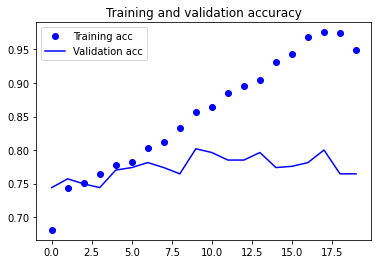

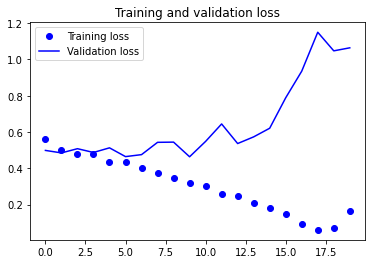

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

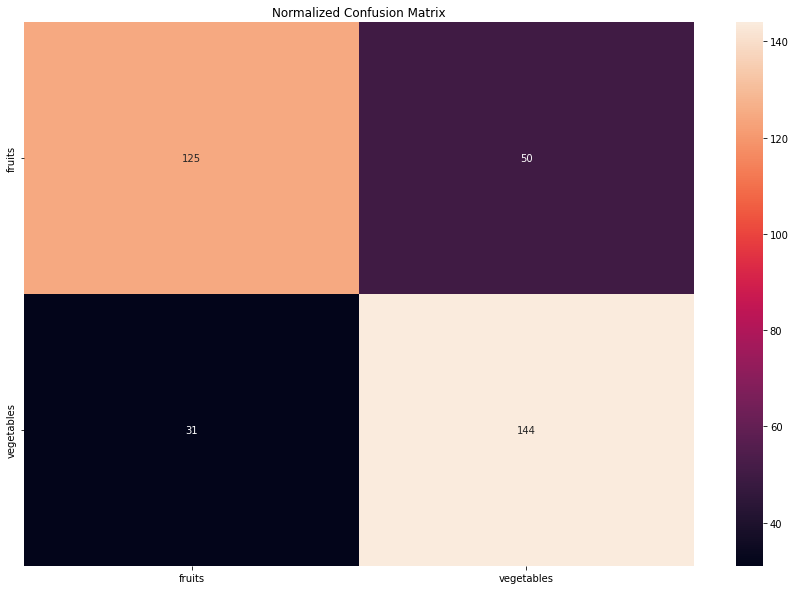

In [ ]:
cf_matrix = confusion_matrix(y_test, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(y_test)), 
            yticklabels = sorted(set(y_test)),fmt="d"
            )
plt.title('Normalized Confusion Matrix')
plt.show()

### Model 3

In [ ]:
#NETWORK ARCHITECTURE

inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)  #<----------- Added Convolutional Layer and increased filter dimension
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_13 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 conv2d_14 (Conv2D)          (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 88, 88, 32)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 86, 86, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                      

In [ ]:
PATH_HOME = '/content/drive/Shareddrives/CIDL/'
dir_name = PATH_HOME + "/models"
model_name = 'model3-scratch-binaryclass.h5'
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,model_name)



earlyStopping = tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=PATIENCE,
                restore_best_weights=True)
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=EPOCH,
    callbacks = [earlyStopping, modelCheckpoint]
)


Epoch 1/20
  5/107 [>.............................] - ETA: 43s - loss: 0.6930 - accuracy: 0.5000

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 16/107 [===>..........................] - ETA: 58s - loss: 0.6903 - accuracy: 0.5500

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


107/107 [==============================] - ETA: 0s - loss: 0.6158 - accuracy: 0.6407
Epoch 00001: val_loss improved from inf to 0.52589, saving model to /content/drive/Shareddrives/CIDL//models/model3-scratch-binaryclass.h5
107/107 [==============================] - 99s 918ms/step - loss: 0.6158 - accuracy: 0.6407 - val_loss: 0.5259 - val_accuracy: 0.7308
Epoch 2/20
107/107 [==============================] - ETA: 0s - loss: 0.5239 - accuracy: 0.7350
Epoch 00002: val_loss did not improve from 0.52589
107/107 [==============================] - 96s 902ms/step - loss: 0.5239 - accuracy: 0.7350 - val_loss: 0.5383 - val_accuracy: 0.7551
Epoch 3/20
107/107 [==============================] - ETA: 0s - loss: 0.4858 - accuracy: 0.7509
Epoch 00003: val_loss improved from 0.52589 to 0.46310, saving model to /content/drive/Shareddrives/CIDL//models/model3-scratch-binaryclass.h5
107/107 [==============================] - 98s 913ms/step - loss: 0.4858 - accuracy: 0.7509 - val_loss: 0.4631 - val_accur

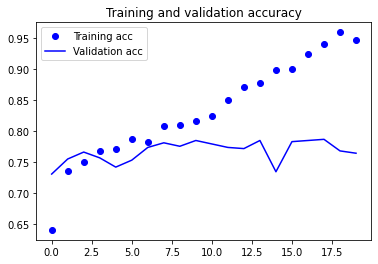

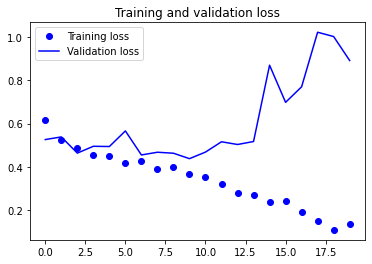

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

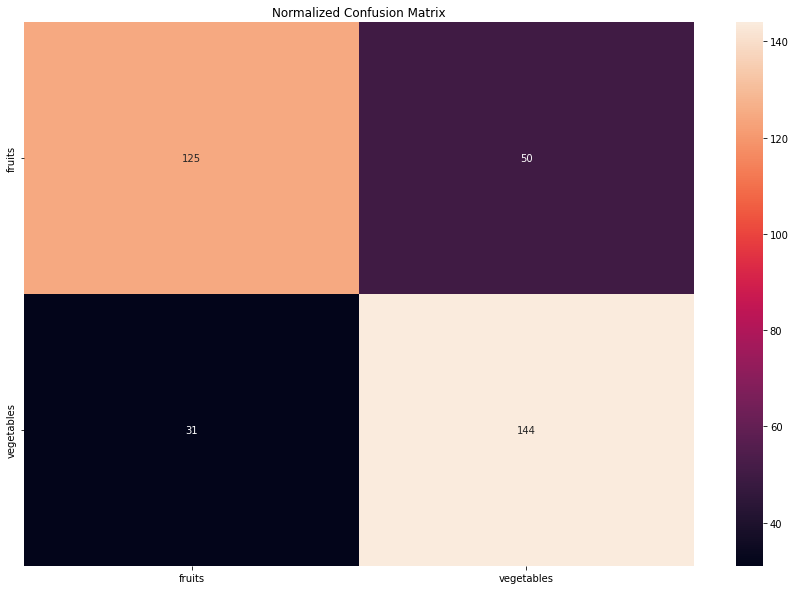

In [ ]:
cf_matrix = confusion_matrix(y_test, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(y_test)), 
            yticklabels = sorted(set(y_test)),fmt="d"
            )
plt.title('Normalized Confusion Matrix')
plt.show()

### Model 4

In [ ]:
#NETWORK ARCHITECTURE

inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)   #<----- Added Hidden Layer into output network
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_19 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 41, 41, 128)       7385

In [ ]:
PATH_HOME = '/content/drive/Shareddrives/CIDL/'
dir_name = PATH_HOME + "/models"
model_name = 'model4-scratch-binaryclass.h5'
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,model_name)



earlyStopping = tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=PATIENCE,
                restore_best_weights=True)
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=EPOCH,
    callbacks = [earlyStopping, modelCheckpoint]
)


Epoch 1/20
 78/107 [====================>.........] - ETA: 20s - loss: 0.7004 - accuracy: 0.5308

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 80/107 [=====================>........] - ETA: 19s - loss: 0.7002 - accuracy: 0.5306

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


107/107 [==============================] - ETA: 0s - loss: 0.6970 - accuracy: 0.5439
Epoch 00001: val_loss improved from inf to 0.66738, saving model to /content/drive/Shareddrives/CIDL//models/model4-scratch-binaryclass.h5
107/107 [==============================] - 98s 904ms/step - loss: 0.6970 - accuracy: 0.5439 - val_loss: 0.6674 - val_accuracy: 0.6411
Epoch 2/20
107/107 [==============================] - ETA: 0s - loss: 0.5361 - accuracy: 0.7299
Epoch 00002: val_loss improved from 0.66738 to 0.48366, saving model to /content/drive/Shareddrives/CIDL//models/model4-scratch-binaryclass.h5
107/107 [==============================] - 96s 905ms/step - loss: 0.5361 - accuracy: 0.7299 - val_loss: 0.4837 - val_accuracy: 0.7570
Epoch 3/20
107/107 [==============================] - ETA: 0s - loss: 0.5012 - accuracy: 0.7458
Epoch 00003: val_loss did not improve from 0.48366
107/107 [==============================] - 96s 902ms/step - loss: 0.5012 - accuracy: 0.7458 - val_loss: 0.4866 - val_accur

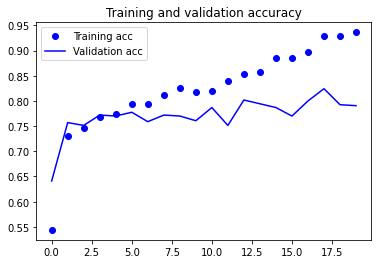

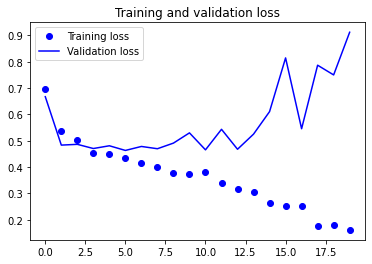

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 76.86%


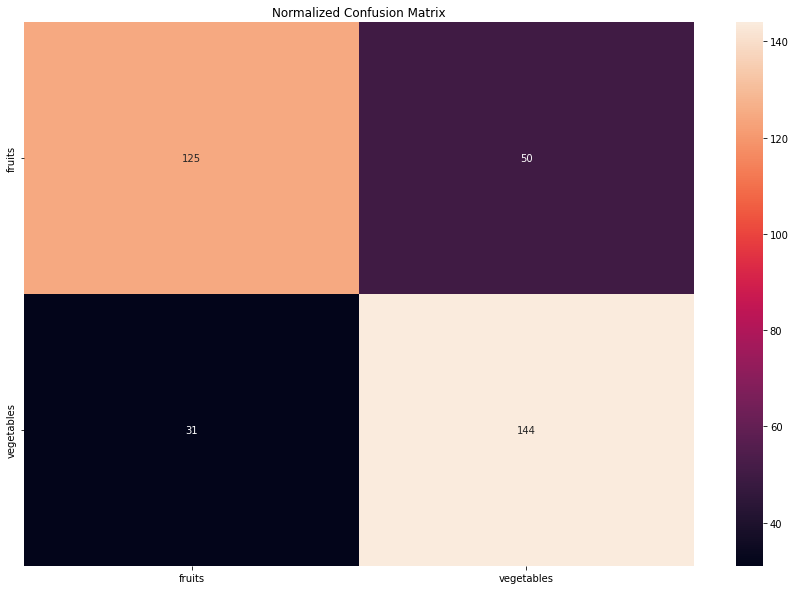

In [ ]:
cf_matrix = confusion_matrix(y_test, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(y_test)), 
            yticklabels = sorted(set(y_test)),fmt="d"
            )
plt.title('Normalized Confusion Matrix')
plt.show()

### Model 5

In [ ]:
#NETWORK ARCHITECTURE

inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

x = data_augmentation(inputs)                                        #<------ Input augmented
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)  
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)   
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

In [ ]:
PATH_HOME = '/content/drive/Shareddrives/CIDL/'
dir_name = PATH_HOME + "/models"
model_name = 'model5-scratch-binaryclass.h5'
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,model_name)



earlyStopping = tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=PATIENCE,
                restore_best_weights=True)
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=EPOCH,
    callbacks = [earlyStopping, modelCheckpoint]
)


Epoch 1/20
 29/107 [=======>......................] - ETA: 59s - loss: 1.4644 - accuracy: 0.5138 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 79/107 [=====================>........] - ETA: 20s - loss: 0.9753 - accuracy: 0.5335

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


107/107 [==============================] - ETA: 0s - loss: 0.9019 - accuracy: 0.5304
Epoch 00001: val_loss improved from inf to 0.69109, saving model to /content/drive/Shareddrives/CIDL//models/model5-scratch-binaryclass.h5
107/107 [==============================] - 100s 926ms/step - loss: 0.9019 - accuracy: 0.5304 - val_loss: 0.6911 - val_accuracy: 0.5421
Epoch 2/20
107/107 [==============================] - ETA: 0s - loss: 0.6918 - accuracy: 0.5407
Epoch 00002: val_loss did not improve from 0.69109
107/107 [==============================] - 96s 893ms/step - loss: 0.6918 - accuracy: 0.5407 - val_loss: 0.6924 - val_accuracy: 0.5290
Epoch 3/20
107/107 [==============================] - ETA: 0s - loss: 0.6809 - accuracy: 0.5813
Epoch 00003: val_loss improved from 0.69109 to 0.66580, saving model to /content/drive/Shareddrives/CIDL//models/model5-scratch-binaryclass.h5
107/107 [==============================] - 96s 901ms/step - loss: 0.6809 - accuracy: 0.5813 - val_loss: 0.6658 - val_accu

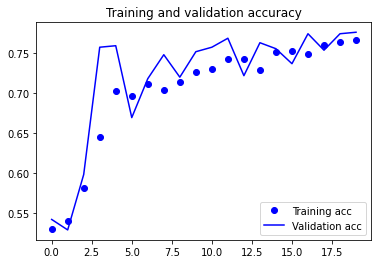

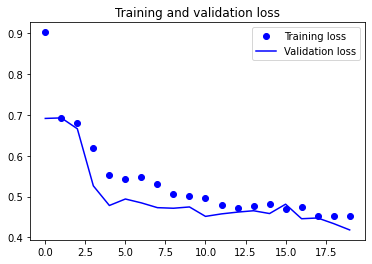

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 78.29%


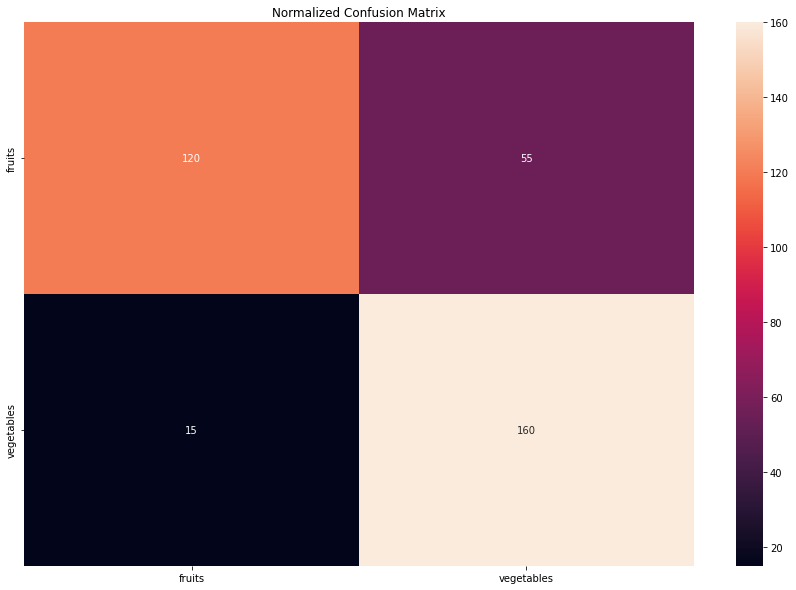

In [ ]:


cf_matrix = confusion_matrix(y_test, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(y_test)), 
            yticklabels = sorted(set(y_test)),fmt="d"
            )
plt.title('Normalized Confusion Matrix')
plt.show()

### Model 6a

In [ ]:
#NETWORK ARCHITECTURE - TO ADD DROPOUT

inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

x = data_augmentation(inputs)   
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)                                            #<-----      Perferming Dropout Technique
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 86, 64)        18496     
                                                             

In [ ]:
PATH_HOME = '/content/drive/Shareddrives/CIDL/'
dir_name = PATH_HOME + "/models"
model_name = 'model6a-scratch-binaryclass.h5'
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,model_name)



earlyStopping = tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=PATIENCE,
                restore_best_weights=True)
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=40,#EPOCH,
    callbacks = [earlyStopping, modelCheckpoint]
)


Epoch 1/40
 64/107 [================>.............] - ETA: 3:04 - loss: 0.9264 - accuracy: 0.5211

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


101/107 [===========================>..] - ETA: 25s - loss: 0.8411 - accuracy: 0.5248

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


107/107 [==============================] - ETA: 0s - loss: 0.8332 - accuracy: 0.5238
Epoch 00001: val_loss improved from inf to 0.68624, saving model to /content/drive/Shareddrives/CIDL//models/model6a-scratch-binaryclass.h5
107/107 [==============================] - 621s 5s/step - loss: 0.8332 - accuracy: 0.5238 - val_loss: 0.6862 - val_accuracy: 0.5589
Epoch 2/40
107/107 [==============================] - ETA: 0s - loss: 0.6815 - accuracy: 0.5383
Epoch 00002: val_loss improved from 0.68624 to 0.64677, saving model to /content/drive/Shareddrives/CIDL//models/model6a-scratch-binaryclass.h5
107/107 [==============================] - 109s 1s/step - loss: 0.6815 - accuracy: 0.5383 - val_loss: 0.6468 - val_accuracy: 0.6467
Epoch 3/40
107/107 [==============================] - ETA: 0s - loss: 0.6619 - accuracy: 0.5804
Epoch 00003: val_loss improved from 0.64677 to 0.58535, saving model to /content/drive/Shareddrives/CIDL//models/model6a-scratch-binaryclass.h5
107/107 [======================

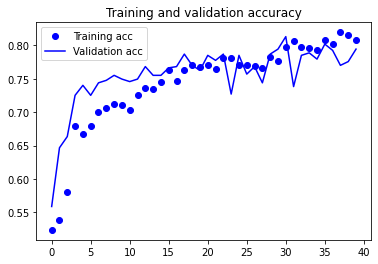

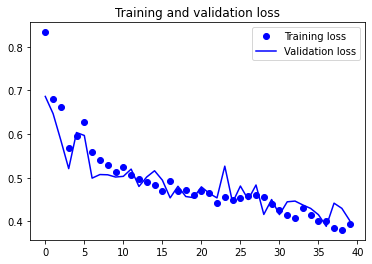

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 80.86%


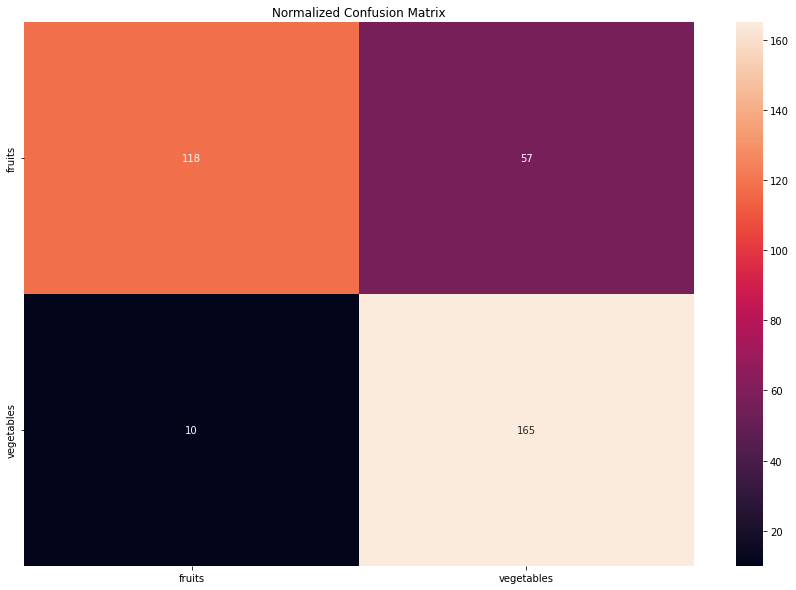

In [ ]:


cf_matrix = confusion_matrix(y_test, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(y_test)), 
            yticklabels = sorted(set(y_test)),fmt="d"
            )
plt.title('Normalized Confusion Matrix')
plt.show()

 ### Model 6b

In [ ]:
#NETWORK ARCHITECTURE - TO ADD DROPOUT

inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

x = data_augmentation(inputs)   
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)   #<----- Added Hidden Layer into output network
x = layers.Dropout(0.2)(x)                                            #<-----      Perferming Dropout Technique
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 88, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 86, 64)        18496     
                                                             

In [ ]:
PATH_HOME = '/content/drive/Shareddrives/CIDL/'
dir_name = PATH_HOME + "/models"
model_name = 'model6b-scratch-binaryclass.h5'
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,model_name)



earlyStopping = tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=PATIENCE,
                restore_best_weights=True)
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=40,#EPOCH,
    callbacks = [earlyStopping, modelCheckpoint]
)


Epoch 1/40
 12/107 [==>...........................] - ETA: 5:17 - loss: 3.5993 - accuracy: 0.4750

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


 64/107 [================>.............] - ETA: 2:28 - loss: 1.2410 - accuracy: 0.5172

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


107/107 [==============================] - ETA: 0s - loss: 1.0200 - accuracy: 0.5346
Epoch 00001: val_loss improved from inf to 0.68564, saving model to /content/drive/Shareddrives/CIDL//models/model6b-scratch-binaryclass.h5
107/107 [==============================] - 519s 4s/step - loss: 1.0200 - accuracy: 0.5346 - val_loss: 0.6856 - val_accuracy: 0.5196
Epoch 2/40
107/107 [==============================] - ETA: 0s - loss: 0.6767 - accuracy: 0.5556
Epoch 00002: val_loss improved from 0.68564 to 0.68180, saving model to /content/drive/Shareddrives/CIDL//models/model6b-scratch-binaryclass.h5
107/107 [==============================] - 95s 885ms/step - loss: 0.6767 - accuracy: 0.5556 - val_loss: 0.6818 - val_accuracy: 0.5196
Epoch 3/40
107/107 [==============================] - ETA: 0s - loss: 0.6808 - accuracy: 0.5505
Epoch 00003: val_loss did not improve from 0.68180
107/107 [==============================] - 94s 882ms/step - loss: 0.6808 - accuracy: 0.5505 - val_loss: 0.6925 - val_accur

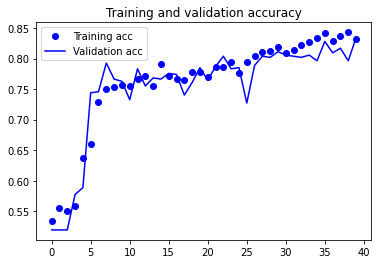

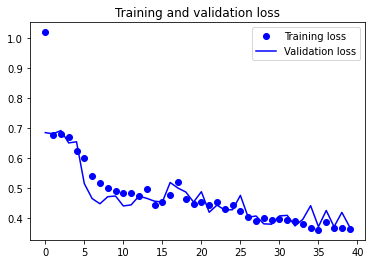

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 81.43%


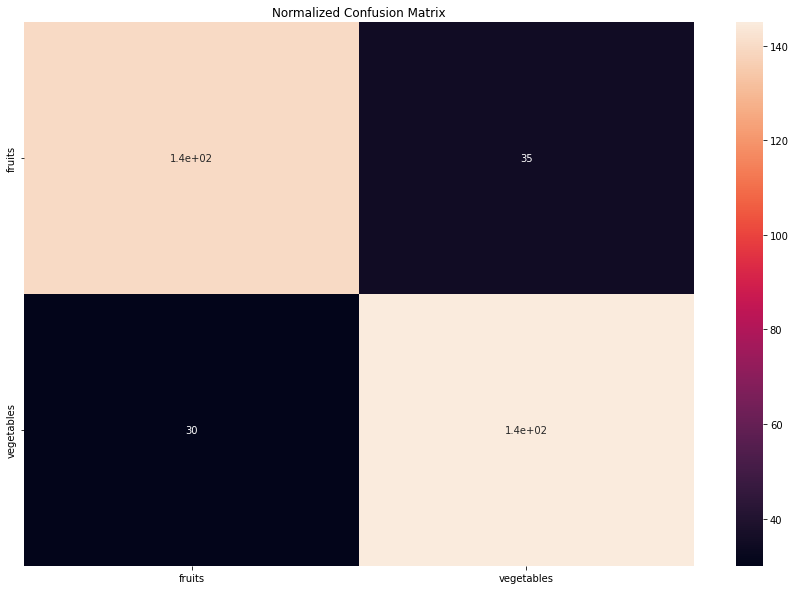

In [ ]:


cf_matrix = confusion_matrix(y_test, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(y_test)), 
            yticklabels = sorted(set(y_test)),
            )
plt.title('Normalized Confusion Matrix')
plt.show()

### Model 7 

In [ ]:
#NETWORK ARCHITECTURE - TO ADD L1 or L2

reg = regularizers.l1_l2(l1=1e-5, l2=1e-4)

inputs = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

x = data_augmentation(inputs)   
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu',kernel_regularizer=reg)(x)
x = layers.Dropout(0.2)(x)    
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 176, 176, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 88, 88, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 86, 86, 64)        18496     
                                                           

In [ ]:
PATH_HOME = '/content/drive/Shareddrives/CIDL/'
dir_name = PATH_HOME + "/models"
model_name = 'model7-scratch-binaryclass.h5'
if not os.path.exists(dir_name):
  os.makedirs(dir_name)
save_path = os.path.join(dir_name,model_name)



earlyStopping = tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=PATIENCE,
                restore_best_weights=True)
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(
                      filepath=save_path,
                      monitor="val_loss",
                      verbose=1,
                      save_best_only=True)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=50,#EPOCH,
    callbacks = [earlyStopping, modelCheckpoint]
)


Epoch 1/50
 10/107 [=>............................] - ETA: 1:10 - loss: 3.3452 - accuracy: 0.4950

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 65/107 [=================>............] - ETA: 30s - loss: 1.4628 - accuracy: 0.5308

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


107/107 [==============================] - ETA: 0s - loss: 1.2741 - accuracy: 0.5285
Epoch 00001: val_loss improved from inf to 0.94921, saving model to /content/drive/Shareddrives/CIDL//models/model7-scratch-binaryclass.h5
107/107 [==============================] - 96s 886ms/step - loss: 1.2741 - accuracy: 0.5285 - val_loss: 0.9492 - val_accuracy: 0.5495
Epoch 2/50
107/107 [==============================] - ETA: 0s - loss: 0.9027 - accuracy: 0.5411
Epoch 00002: val_loss improved from 0.94921 to 0.86493, saving model to /content/drive/Shareddrives/CIDL//models/model7-scratch-binaryclass.h5
107/107 [==============================] - 93s 873ms/step - loss: 0.9027 - accuracy: 0.5411 - val_loss: 0.8649 - val_accuracy: 0.5495
Epoch 3/50
107/107 [==============================] - ETA: 0s - loss: 0.8475 - accuracy: 0.5379
Epoch 00003: val_loss improved from 0.86493 to 0.82380, saving model to /content/drive/Shareddrives/CIDL//models/model7-scratch-binaryclass.h5
107/107 [=====================

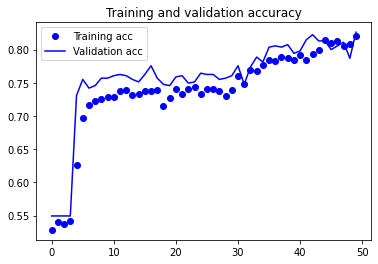

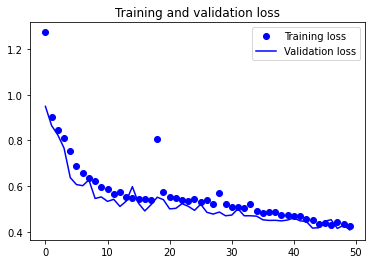

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
pred = pred[:,0]

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

y_test = [labels[k] for k in test_images.classes]

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print(f'Accuracy on the test set: {100*acc:.2f}%')

Accuracy on the test set: 79.71%


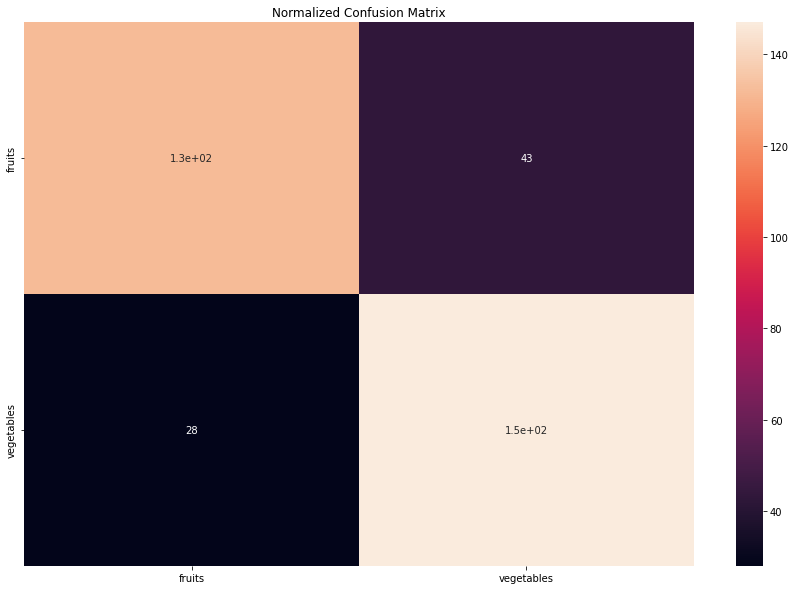

In [ ]:
cf_matrix = confusion_matrix(y_test, pred, normalize=None)
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, 
            annot=True, 
            xticklabels = sorted(set(y_test)), 
            yticklabels = sorted(set(y_test)),
            )
plt.title('Normalized Confusion Matrix')
plt.show()